In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation    
sns.set(color_codes=True)

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
data_path = '/Users/kajalshukla/Desktop/MLOPs/Assignments/Assignment-1/adsp_ml_ops/data/athletes.csv'
data = pd.read_csv(data_path)

In [3]:
data.head(3)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Raw data

## Data Cleaning

In [4]:
## Remove null values of relevant columns
relevant_columns = ['region', 'age', 'weight', 'height', 'howlong', 'gender', 'eat', 'train', 
                    'background', 'experience', 'schedule', 'deadlift', 'candj', 'snatch', 'backsq']
data = data.dropna(subset=relevant_columns)

In [5]:
## Remove irrelevant columns
irrelevant_columns = ['affiliate', 'team', 'name', 'athlete_id', 'fran', 'helen', 'grace',
                      'filthy50', 'fgonebad', 'run400', 'run5k', 'pullups', 'train']
data = data.drop(columns=irrelevant_columns)

In [10]:
## Remove outliers
# data = data[data['weight'] < 1500]
# data = data[data['gender'] != '--']
# data = data[data['age'] >= 18]
# data = data[(data['height'] < 96) & (data['height'] > 48)]

# data = data[
#     (data['deadlift'] > 0) & (data['deadlift'] <= 1105) | 
#     ((data['gender'] == 'Female') & (data['deadlift'] <= 636))
# ]
# data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
# data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
# data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

In [6]:
data.head(5)

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong
6,South Central,Male,21.0,72.0,175.0,0.0,0.0,0.0,0.0,I eat quality foods but don't measure the amou...,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|
13,Central East,Male,43.0,71.0,185.0,0.0,0.0,0.0,0.0,I eat quality foods but don't measure the amount|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I typically ...,2-4 years|
21,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|
22,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|
27,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|


In [11]:
## Clean survey data
# decline_dict = {'Decline to answer|': np.nan}
# data = data.replace(decline_dict)
# data = data.dropna(subset=['background', 'experience', 'schedule', 'howlong', 'eat'])


### Determine the highest variability in columns to calculate total_lift

In [7]:
#Calculate standard deviation
numeric_columns = ['age', 'weight', 'height', 'howlong', 'deadlift', 'candj', 'snatch', 'backsq']

data_v1_std_devs = data[numeric_columns].std()

#Sort columns by their standard devation
sorted_columns_v1 = data_v1_std_devs.sort_values(ascending=False).index.tolist()

/var/folders/dn/9qflv0c57rl7ynhwt9tnqmrr0000gn/T/ipykernel_1242/2011793858.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_v1_std_devs = data[numeric_columns].std()


In [8]:
print(sorted_columns_v1)

['deadlift', 'height', 'backsq', 'snatch', 'candj', 'weight', 'age']


### The highest variability to calculate total_lift is 'deadlift', 'backsq', 'candj', 'snatch'

In [9]:
data['total_lift'] = data['deadlift'] + data['candj'] + data['snatch'] + data['backsq']


In [10]:
data.dtypes

region         object
gender         object
age           float64
height        float64
weight        float64
candj         float64
snatch        float64
deadlift      float64
backsq        float64
eat            object
background     object
experience     object
schedule       object
howlong        object
total_lift    float64
dtype: object

In [11]:
data.shape

(32172, 15)

In [12]:
data.count()

region        32172
gender        32172
age           32172
height        32172
weight        32172
candj         32172
snatch        32172
deadlift      32172
backsq        32172
eat           32172
background    32172
experience    32172
schedule      32172
howlong       32172
total_lift    32172
dtype: int64

In [13]:
data = data.drop_duplicates()
print(data.isnull().sum())

region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
total_lift    0
dtype: int64


In [14]:
data.describe()

,age,height,weight,candj,snatch,deadlift,backsq,total_lift
count,32171.000000,3.217100e+04,32171.000000,32171.000000,32171.000000,3.217100e+04,3.217100e+04,3.217100e+04
mean,32.038979,3.293813e+02,176.872183,200.763296,152.998353,8.744933e+02,5.479909e+02,1.776246e+03
std,7.510277,4.676856e+04,33.550537,73.657778,73.820819,6.613757e+04,4.676746e+04,1.046007e+05
min,14.000000,0.000000e+00,5.000000,-45.000000,0.000000,-5.000000e+02,0.000000e+00,-2.200000e+01
25%,27.000000,6.600000e+01,155.000000,155.000000,115.000000,2.800000e+02,2.250000e+02,7.800000e+02
50%,31.000000,6.900000e+01,178.000000,205.000000,155.000000,3.650000e+02,2.950000e+02,1.025000e+03
75%,37.000000,7.200000e+01,196.000000,245.000000,190.000000,4.300000e+02,3.550000e+02,1.220000e+03
max,56.000000,8.388607e+06,1750.000000,5000.000000,8095.000000,8.388607e+06,8.388607e+06,1.678231e+07


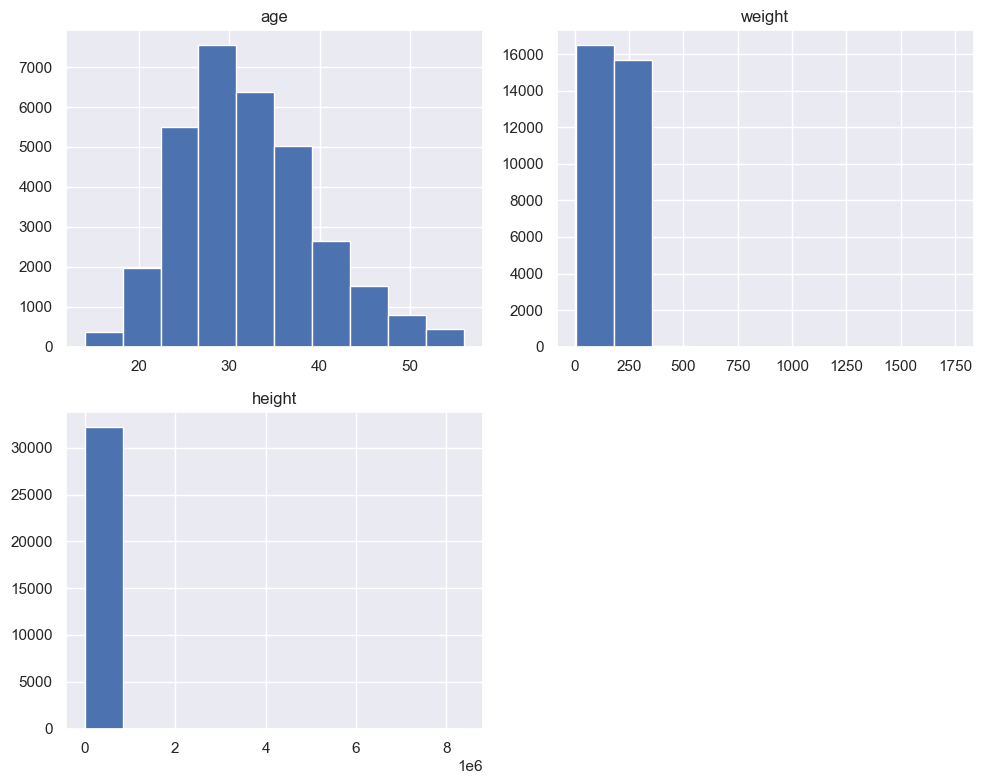

In [15]:
#Histogram for age, weight and height
data[['age', 'weight', 'height']].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

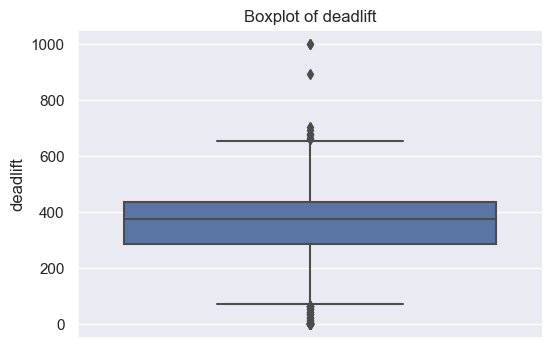

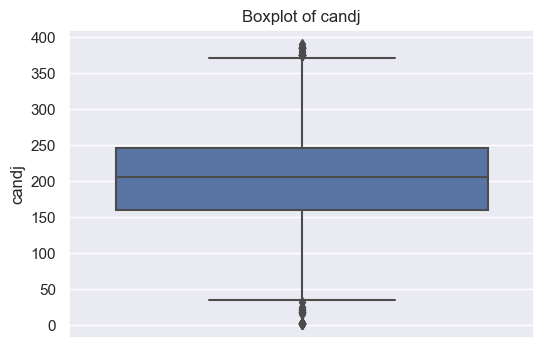

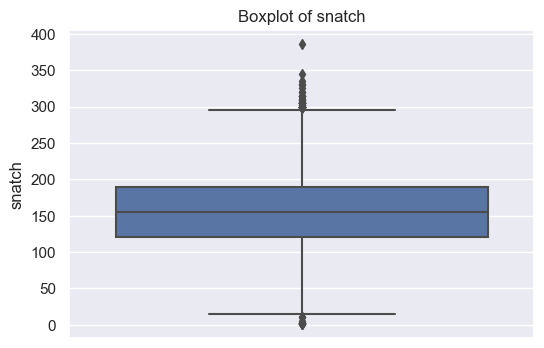

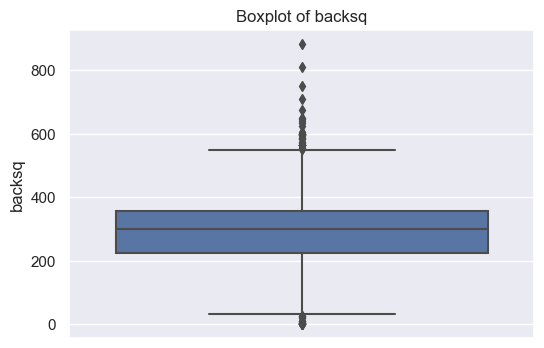

In [31]:
#Boxplot for numeric lifting columns
lift_columns_v1 = ['deadlift', 'candj', 'snatch', 'backsq']
for col in lift_columns_v1:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Text(0.5, 0, 'Gender(0:male, 1:female)')

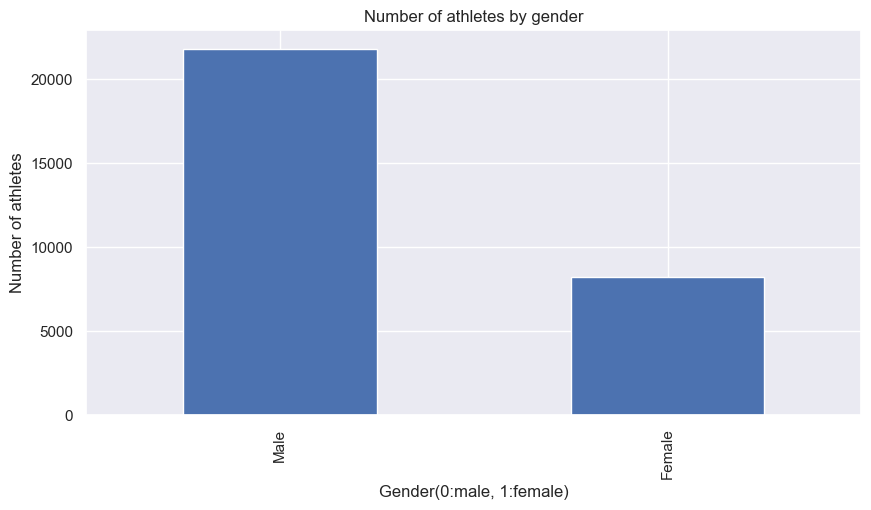

In [35]:
# gender counts
data["gender"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of athletes by gender")
plt.ylabel('Number of athletes')
plt.xlabel('Gender(0:male, 1:female)')

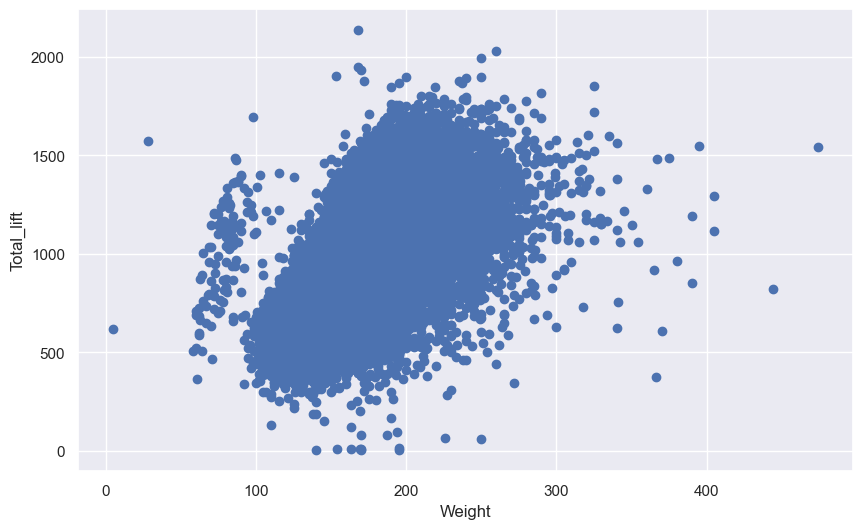

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["weight"], data['total_lift'])
ax.set_xlabel('Weight')
ax.set_ylabel('Total_lift')
plt.show()

## Dealing with Categorical Values

In [43]:
# One-Hot Encoding for categorical columns
categorical_cols = ['region', 'gender', 'eat', 'background', 'experience', 'schedule', 'howlong']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [44]:
# Convert float columns to int
float_cols = ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'total_lift']
for col in float_cols:
    data[col] = data[col].astype(int)

In [46]:
# Verify the changes
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

data.dtypes

age                                                                                                                                                                                                                                                                                                                           int64
height                                                                                                                                                                                                                                                                                                                        int64
weight                                                                                                                                                                                                                                                                                                                        int64
candj                       

## EDA

## Model

In [47]:
#Split data for data_v1
X_v1  = data.drop('total_lift', axis=1)
y_v1 = data['total_lift']
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.2, random_state=42) 


In [48]:
# Baseline model on data version 1
model_v1 = LinearRegression()

In [49]:
model_v1.fit(X_train_v1, y_train_v1)

LinearRegression()

In [51]:
# Make predictions
y_pred_v1 = model_v1.predict(X_test_v1)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test_v1, y_pred_v1)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.0625855414928105e-25


In [53]:
r2 = r2_score(y_test_v1, y_pred_v1)
print(f'R-squared: {r2}')

R-squared: 1.0
